In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
data = []
label = []

In [ ]:
EOSINOPHIL = os.listdir(r'blood-cells\dataset2-master\dataset2-master\images\TRAIN\EOSINOPHIL')
LYMPHOCYTE = os.listdir(r'blood-cells\dataset2-master\dataset2-master\images\TRAIN\LYMPHOCYTE')
MONOCYTE = os.listdir(r'blood-cells\dataset2-master\dataset2-master\images\TRAIN\MONOCYTE')
NEUTROPHIL = os.listdir(r'blood-cells\dataset2-master\dataset2-master\images\TRAIN\NEUTROPHIL')

In [ ]:
for img in EOSINOPHIL:
    img_arr = cv2.imread(r'blood-cells\dataset2-master\dataset2-master\images\TRAIN\EOSINOPHIL\{}'.format(img))
    img_arr = cv2.resize(img_arr, (128, 128))
    img_arr = img_arr / 255.0

    data.append(img_arr)
    label.append(0)

In [ ]:
for img in LYMPHOCYTE:
    img_arr = cv2.imread(r'blood-cells\dataset2-master\dataset2-master\images\TRAIN\LYMPHOCYTE\{}'.format(img))
    img_arr = cv2.resize(img_arr, (128, 128))
    img_arr = img_arr / 255.0

    data.append(img_arr)
    label.append(1)

In [ ]:
for img in MONOCYTE:
    img_arr = cv2.imread(r'blood-cells\dataset2-master\dataset2-master\images\TRAIN\MONOCYTE\{}'.format(img))
    img_arr = cv2.resize(img_arr, (128, 128))
    img_arr = img_arr / 255.0

    data.append(img_arr)
    label.append(2)

In [ ]:
for img in NEUTROPHIL:
    img_arr = cv2.imread(r'blood-cells\dataset2-master\dataset2-master\images\TRAIN\NEUTROPHIL\{}'.format(img))
    img_arr = cv2.resize(img_arr, (128, 128))
    img_arr = img_arr / 255.0

    data.append(img_arr)
    label.append(3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

from keras.optimizers import Adadelta
import cv2

Using TensorFlow backend.


In [ ]:
x = np.load(r'/content/drive/My Drive/Colab Notebooks/x.npy')
y = np.load(r'/content/drive/My Drive/Colab Notebooks/y.npy')

In [ ]:
np.shape(data)

(9957, 128, 128, 3)

In [ ]:
x = np.array(data)
y = to_categorical(label)

In [ ]:
import itertools 
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
  else:
     print('Confusion matrix, without normalization')
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
 
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label') 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.01)

In [ ]:
model_name = 'Model_1'
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
#extra CRP
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(4, activation='softmax'))
model1.compile(loss='categorical_crossentropy',
                  optimizer=Adadelta(),
                  metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [ ]:
history1 = model1.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.01)

Train on 9758 samples, validate on 99 samples
Epoch 1/20
9758/9758 [==============================] - 11s 1ms/step - loss: 1.3895 - accuracy: 0.2571 - val_loss: 1.3818 - val_accuracy: 0.3131
Epoch 2/20
9758/9758 [==============================] - 4s 451us/step - loss: 1.3498 - accuracy: 0.3262 - val_loss: 1.3422 - val_accuracy: 0.2727
Epoch 3/20
9758/9758 [==============================] - 4s 456us/step - loss: 1.1669 - accuracy: 0.4594 - val_loss: 0.9338 - val_accuracy: 0.6465
Epoch 4/20
9758/9758 [==============================] - 4s 456us/step - loss: 0.8120 - accuracy: 0.6521 - val_loss: 0.5816 - val_accuracy: 0.7576
Epoch 5/20
9758/9758 [==============================] - 4s 454us/step - loss: 0.5323 - accuracy: 0.7770 - val_loss: 0.6163 - val_accuracy: 0.7677
Epoch 6/20
9758/9758 [==============================] - 5s 473us/step - loss: 0.3897 - accuracy: 0.8479 - val_loss: 0.4198 - val_accuracy: 0.8182
Epoch 7/20
9758/9758 [==============================] - 5s 489us/step - loss: 0

In [ ]:
score1 = model1.evaluate(x_test, y_test)

100/100 [==============================] - 0s 527us/step


In [ ]:
score1[1]*100

88.99999856948853

In [ ]:
y_pred=model1.predict(x_test)

0.99518347


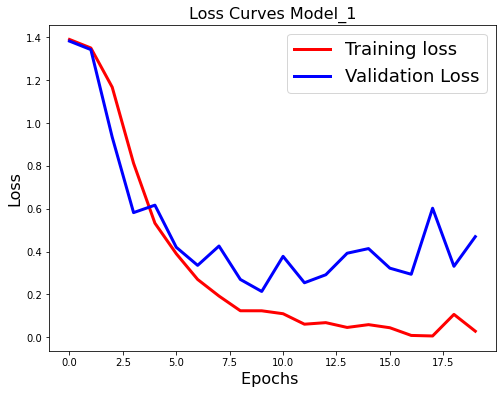

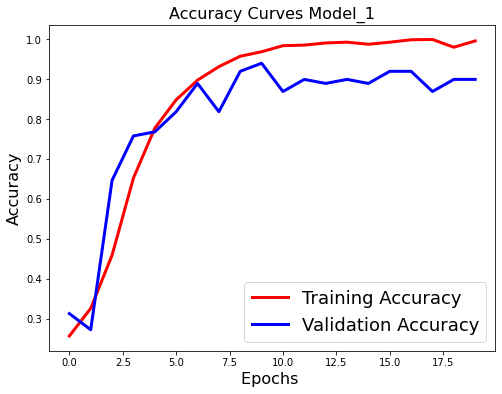

In [ ]:
 #Loss Curves
    plt.figure(figsize=[8,6]);
    plt.plot(history1.history['loss'],'r',linewidth=3.0);
    plt.plot(history1.history['val_loss'],'b',linewidth=3.0);
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18);
    plt.xlabel('Epochs ',fontsize=16);
    plt.ylabel('Loss',fontsize=16);
    plt.title('Loss Curves {}'.format(model_name),fontsize=16);
   

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history1.history['accuracy'],'r',linewidth=3.0);
    plt.plot(history1.history['val_accuracy'],'b',linewidth=3.0);
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18);
    plt.xlabel('Epochs ',fontsize=16);
    plt.ylabel('Accuracy',fontsize=16);
    plt.title('Accuracy Curves {}'.format(model_name),fontsize=16);
   

    print(history1.history['accuracy'][-1])

In [ ]:
categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)


In [ ]:
cell_types=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE ","NEUTROPHIL"]
classification_metrics=metrics.classification_report(categorical_test_labels,categorical_preds,target_names=cell_types)
print(classification_metrics)

              precision    recall  f1-score   support

  EOSINOPHIL       0.83      0.80      0.81        30
  LYMPHOCYTE       0.93      1.00      0.96        13
   MONOCYTE        1.00      1.00      1.00        27
  NEUTROPHIL       0.83      0.83      0.83        30

    accuracy                           0.89       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.89      0.89      0.89       100



Normalized confusion matrix


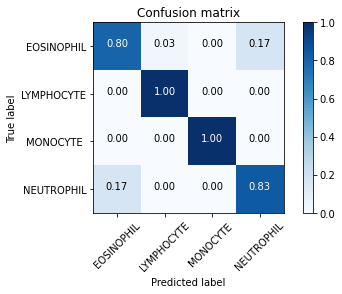

In [ ]:
plot_confusion_matrix(confusion_matrix,["EOSINOPHIL","LYMPHOCYTE","MONOCYTE ","NEUTROPHIL"],normalize=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.01)

In [ ]:
from keras.

In [ ]:
model_name = 'Model_2'
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=x_train.shape[1:],strides=1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
#extra CRP
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(4, activation='softmax'))
model2.compile(loss='categorical_crossentropy',
                  optimizer=Adadelta(),
                  metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)       

In [ ]:
history2 = model2.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.01)

Train on 9758 samples, validate on 99 samples
Epoch 1/20
9758/9758 [==============================] - 16s 2ms/step - loss: 1.3873 - accuracy: 0.2540 - val_loss: 1.3694 - val_accuracy: 0.2929
Epoch 2/20
9758/9758 [==============================] - 10s 993us/step - loss: 1.3253 - accuracy: 0.3532 - val_loss: 1.3864 - val_accuracy: 0.3030
Epoch 3/20
9758/9758 [==============================] - 10s 993us/step - loss: 1.1617 - accuracy: 0.4657 - val_loss: 1.0439 - val_accuracy: 0.5253
Epoch 4/20
9758/9758 [==============================] - 10s 992us/step - loss: 0.9707 - accuracy: 0.5707 - val_loss: 0.7208 - val_accuracy: 0.6970
Epoch 5/20
9758/9758 [==============================] - 10s 993us/step - loss: 0.6748 - accuracy: 0.7069 - val_loss: 0.5282 - val_accuracy: 0.7778
Epoch 6/20
9758/9758 [==============================] - 10s 992us/step - loss: 0.5034 - accuracy: 0.7873 - val_loss: 0.3519 - val_accuracy: 0.8182
Epoch 7/20
9758/9758 [==============================] - 10s 993us/step - l

In [ ]:
score2 = model2.evaluate(x_test, y_test)

100/100 [==============================] - 0s 1ms/step


In [ ]:
score2[1]*100

95.99999785423279

In [ ]:
y_pred=model2.predict(x_test)

0.98770237


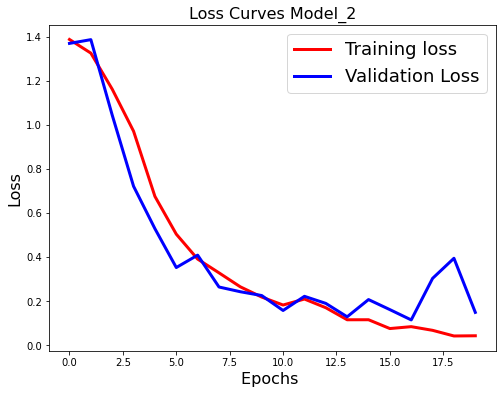

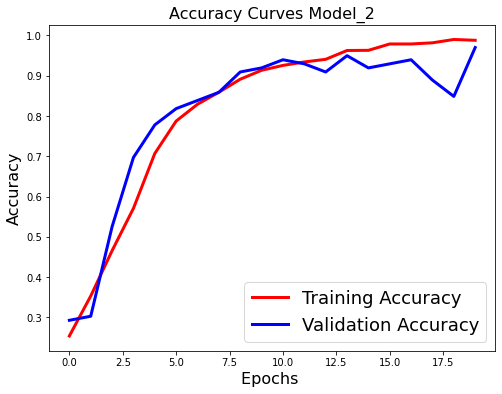

In [ ]:
 #Loss Curves
    plt.figure(figsize=[8,6]);
    plt.plot(history2.history['loss'],'r',linewidth=3.0);
    plt.plot(history2.history['val_loss'],'b',linewidth=3.0);
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18);
    plt.xlabel('Epochs ',fontsize=16);
    plt.ylabel('Loss',fontsize=16);
    plt.title('Loss Curves {}'.format(model_name),fontsize=16);
   

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history2.history['accuracy'],'r',linewidth=3.0);
    plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0);
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18);
    plt.xlabel('Epochs ',fontsize=16);
    plt.ylabel('Accuracy',fontsize=16);
    plt.title('Accuracy Curves {}'.format(model_name),fontsize=16);
   

    print(history2.history['accuracy'][-1])

Normalized confusion matrix


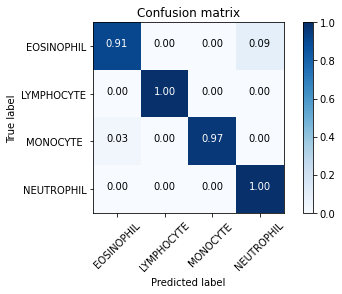

In [ ]:
categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)
plot_confusion_matrix(confusion_matrix,["EOSINOPHIL","LYMPHOCYTE","MONOCYTE ","NEUTROPHIL"],normalize=True)

In [ ]:
cell_types=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE ","NEUTROPHIL"]
classification_metrics=metrics.classification_report(categorical_test_labels,categorical_preds,target_names=cell_types)
print(classification_metrics)

              precision    recall  f1-score   support

  EOSINOPHIL       0.97      0.91      0.94        32
  LYMPHOCYTE       1.00      1.00      1.00        22
   MONOCYTE        1.00      0.97      0.98        29
  NEUTROPHIL       0.85      1.00      0.92        17

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



In [ ]:
#model 3
model_name = 'Model_3'
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=x_train.shape[1:],strides=1))
model3.add(MaxPooling2D(pool_size=(2, 2)))


model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))



model3.add(Flatten())
model3.add(Dense(128, activation='relu'))


#add dropout 
model3.add(Dropout(0.5))

model3.add(Dense(4, activation='softmax'))
model3.compile(loss='categorical_crossentropy',
                  optimizer=Adadelta(),
                  metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [ ]:
history3 = model3.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.01)

Train on 9758 samples, validate on 99 samples
Epoch 1/20
9758/9758 [==============================] - 16s 2ms/step - loss: 1.3820 - accuracy: 0.2715 - val_loss: 1.3725 - val_accuracy: 0.3131
Epoch 2/20
9758/9758 [==============================] - 10s 991us/step - loss: 1.2666 - accuracy: 0.3981 - val_loss: 1.2038 - val_accuracy: 0.4545
Epoch 3/20
9758/9758 [==============================] - 10s 994us/step - loss: 1.0351 - accuracy: 0.5397 - val_loss: 1.8859 - val_accuracy: 0.2727
Epoch 4/20
9758/9758 [==============================] - 10s 995us/step - loss: 0.7595 - accuracy: 0.6668 - val_loss: 0.7160 - val_accuracy: 0.6869
Epoch 5/20
9758/9758 [==============================] - 10s 996us/step - loss: 0.5525 - accuracy: 0.7592 - val_loss: 0.7984 - val_accuracy: 0.6364
Epoch 6/20
9758/9758 [==============================] - 10s 996us/step - loss: 0.4423 - accuracy: 0.8145 - val_loss: 0.4580 - val_accuracy: 0.8283
Epoch 7/20
9758/9758 [==============================] - 10s 1ms/step - los

In [ ]:
score3=model3.evaluate(x_test,y_test)

100/100 [==============================] - 0s 1ms/step


In [ ]:
score3

[0.22251932322978973, 0.949999988079071]

0.9773519


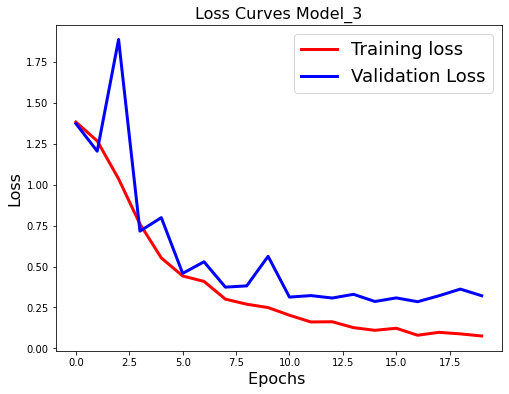

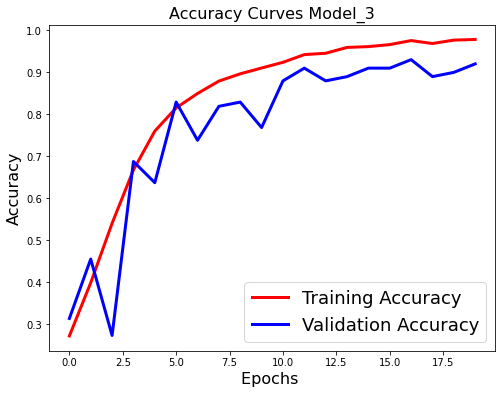

In [ ]:
 # Loss Curves
    plt.figure(figsize=[8,6]);
    plt.plot(history3.history['loss'],'r',linewidth=3.0);
    plt.plot(history3.history['val_loss'],'b',linewidth=3.0);
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18);
    plt.xlabel('Epochs ',fontsize=16);
    plt.ylabel('Loss',fontsize=16);
    plt.title('Loss Curves {}'.format(model_name),fontsize=16);
   

    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history3.history['accuracy'],'r',linewidth=3.0);
    plt.plot(history3.history['val_accuracy'],'b',linewidth=3.0);
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18);
    plt.xlabel('Epochs ',fontsize=16);
    plt.ylabel('Accuracy',fontsize=16);
    plt.title('Accuracy Curves {}'.format(model_name),fontsize=16);
   

    print(history3.history['accuracy'][-1])

In [ ]:
y_pred=model3.predict(x_test)

In [ ]:
categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)


In [ ]:
confusion_matrix

array([[34,  0,  0,  1],
       [ 0, 21,  0,  0],
       [ 0,  0, 24,  1],
       [ 2,  1,  0, 16]])

In [ ]:
cell_types=["EOSINOPHIL","LYMPHOCYTE","MONOCYTE ","NEUTROPHIL"]
classification_metrix= metrics.classification_report(categorical_test_labels, categorical_preds,target_names=cell_types)

In [ ]:
print(classification_metrix)

              precision    recall  f1-score   support

  EOSINOPHIL       0.94      0.97      0.96        35
  LYMPHOCYTE       0.95      1.00      0.98        21
   MONOCYTE        1.00      0.96      0.98        25
  NEUTROPHIL       0.89      0.84      0.86        19

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



Normalized confusion matrix


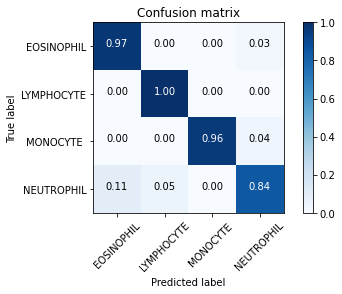

In [ ]:
plot_confusion_matrix(confusion_matrix,["EOSINOPHIL","LYMPHOCYTE","MONOCYTE ","NEUTROPHIL"],normalize=True)